In [1]:
#importing packages
import streamlit as st
import pandas as pd
import numpy as np

In [2]:
#know about the data
data=pd.read_csv("personality_dataset.csv")
print(data.head())
print(data.info())
print(data.describe())

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data co

In [3]:
#removing null values
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB
None


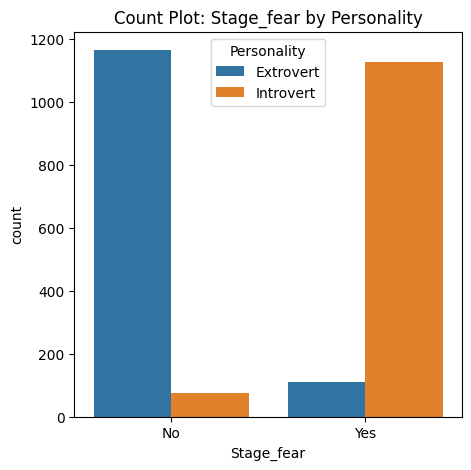

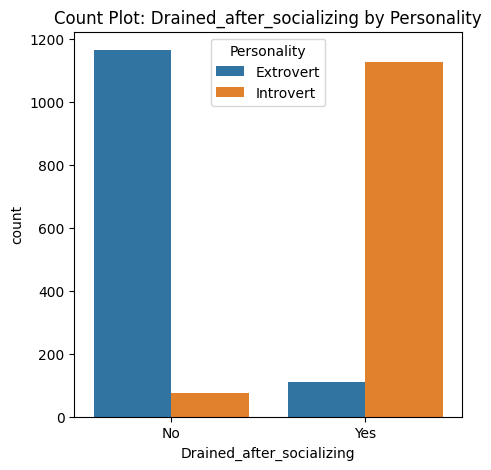

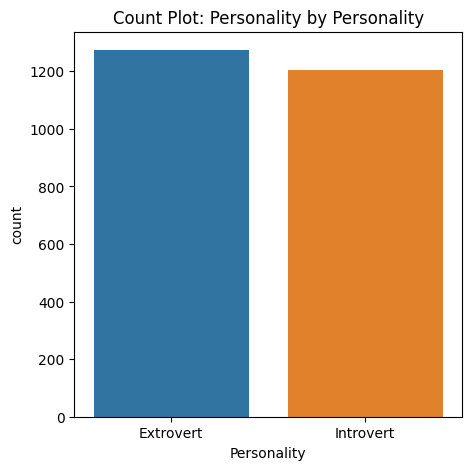

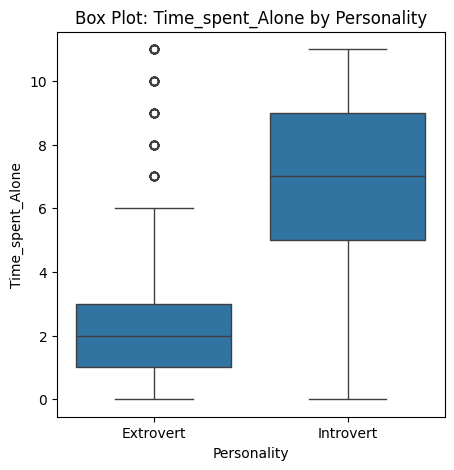

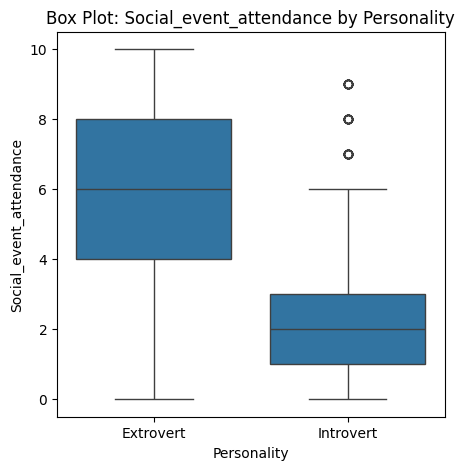

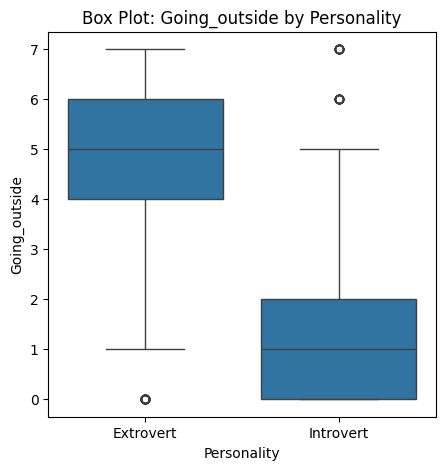

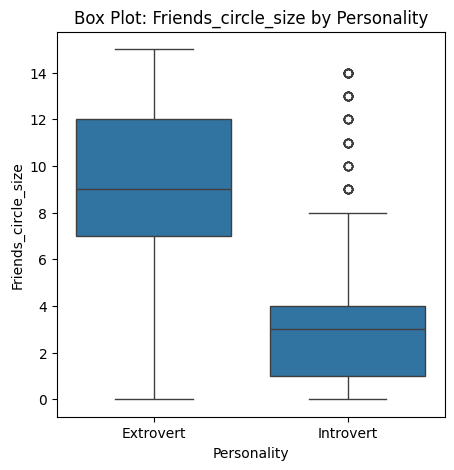

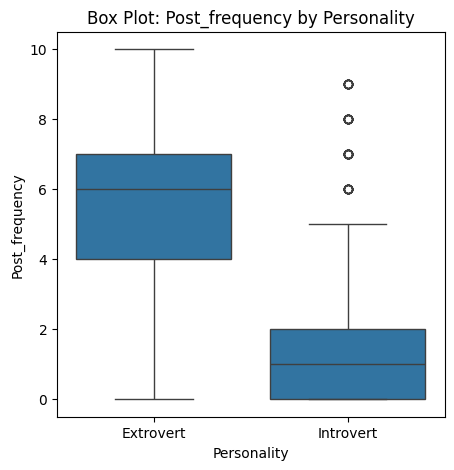

In [4]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['number']).columns
for col in categorical_columns:
    plt.figure(figsize=(5, 5))
    seaborn.countplot(x=col, hue='Personality', data=data)
    plt.title(f'Count Plot: {col} by Personality')
    plt.show()

# Plot for numerical columns (Boxplot for each numerical column, split by Personality)
for col in numerical_columns:
    plt.figure(figsize=(5,5))
    seaborn.boxplot(x='Personality', y=col, data=data)
    plt.title(f'Box Plot: {col} by Personality')
    plt.show()

In [5]:
#Lavel Encoding --> converting chategorical data into integers
from sklearn.preprocessing import LabelEncoder

cols=["Stage_fear","Drained_after_socializing","Personality"]
for i in cols:
  le=LabelEncoder()
  data[i]=le.fit_transform(data[i])

print(data.head()) 

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  


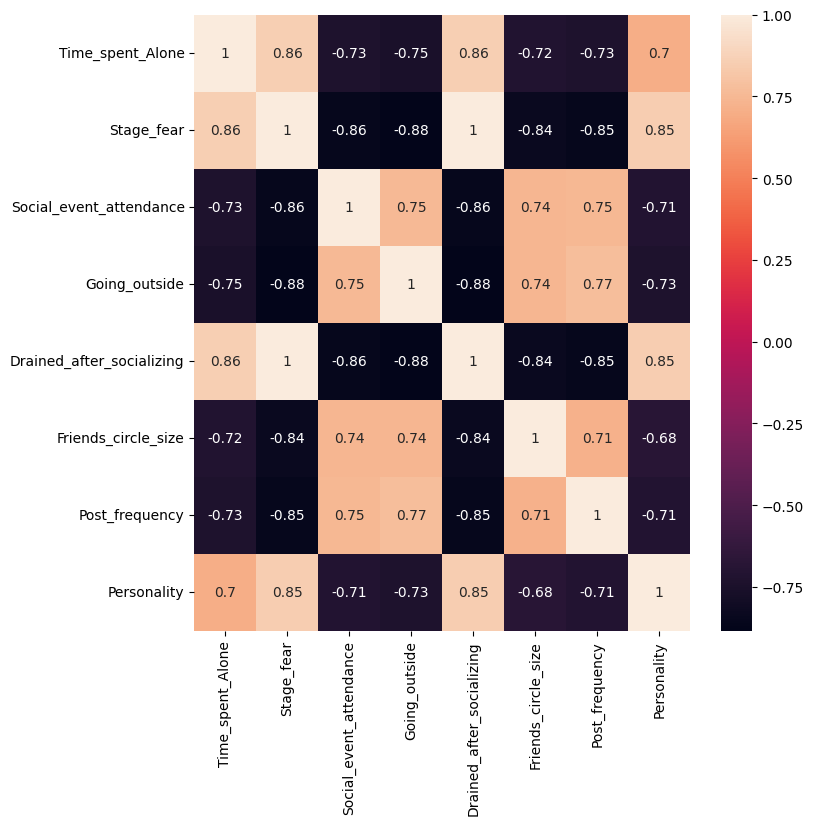

In [6]:
plt.figure(figsize=(8,8))
seaborn.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
#separating independent and dependent features
x=data.drop("Personality",axis=1)
y=data["Personality"]

In [8]:
#splitting te data into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Stage_fear'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Drained_after_socializing'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >, <Axes: >]],
      dtype=object)

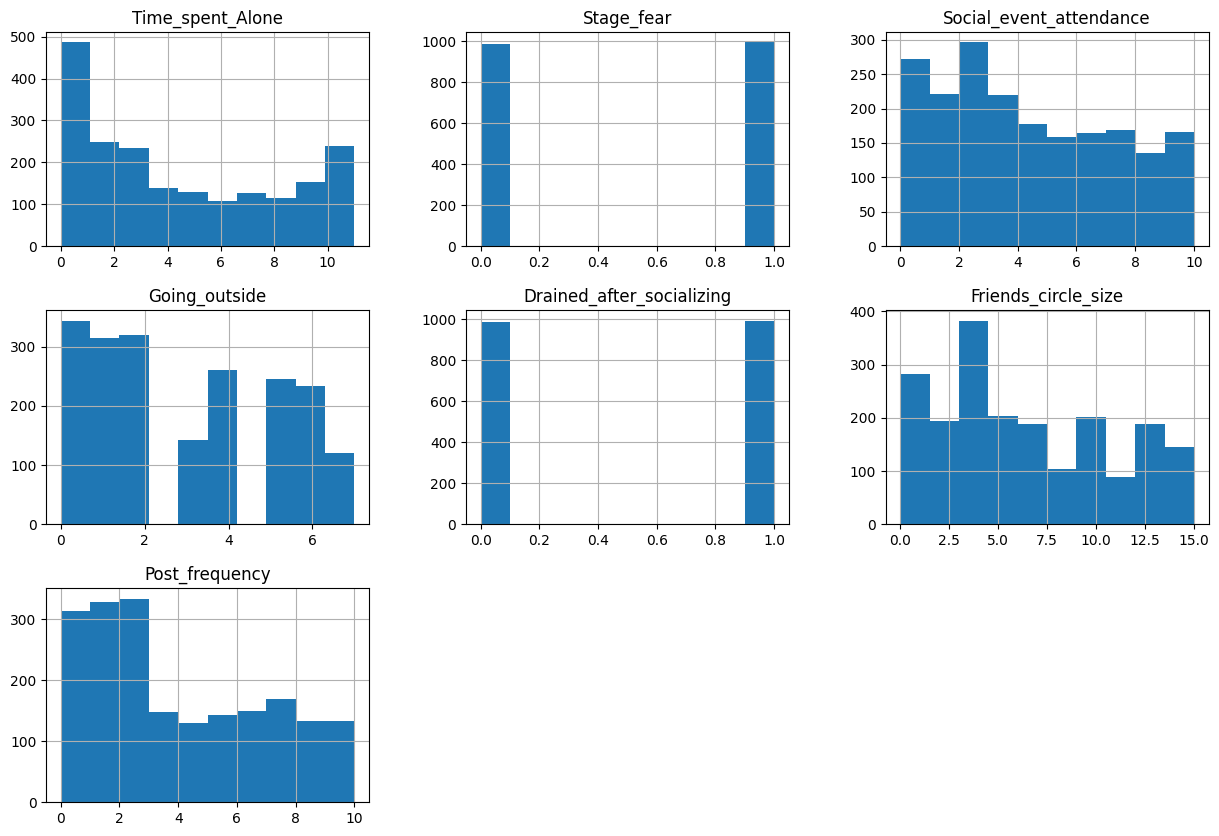

In [9]:
#plottin the historams for te train data
xtrain.hist(figsize=(15,10))

In [10]:
#buliding model and trining
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ytest,ypred)*100)

91.93548387096774


In [11]:
import joblib
joblib.dump(model,'personality_analysis.pkl')

['personality_analysis.pkl']

In [13]:
print(model.predict([[0.56, 1, 0.71, 0.43, 1, 0.89, 0.38]]))

[1]


c:\Users\renuk\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
